# Classification using Tensorflow2
This notebook talks about the classification task on IRIS dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris  # import iris dataset
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
# load iris dataset and understand it
iris = load_iris()  # iris is a dictionary
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# convert 'iris' dictionary to pandas dataframe
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print('Data:')
print(X.head())
y = pd.DataFrame(data = iris.target, columns=['irisType'])
print('Target:')
print(y.head())

Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Target:
   irisType
0         0
1         0
2         0
3         0
4         0


In [4]:
# label info
print('Distribution of labels:')
print(y.irisType.value_counts())
print(iris.target_names)

Distribution of labels:
2    50
1    50
0    50
Name: irisType, dtype: int64
['setosa' 'versicolor' 'virginica']


# Data preprocessing

In [5]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# convert labels into one-hot vector to avoid bias
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train[:5,:] # QC purpose

# Extract X's pandas into numpy arrays
X_train = X_train.values
X_test = X_test.values

# Data modeling

In [6]:
# base model
tf2_model1 = Sequential()  # sequential object

tf2_model1.add(Dense(64, activation='relu', input_shape=X_train[0].shape))
tf2_model1.add(Dense(128, activation='relu'))
tf2_model1.add(Dense(128, activation='relu'))
tf2_model1.add(Dense(128, activation='relu'))
tf2_model1.add(Dense(128, activation='relu'))
tf2_model1.add(Dense(64, activation='relu'))
tf2_model1.add(Dense(64, activation='relu'))
tf2_model1.add(Dense(64, activation='relu'))
tf2_model1.add(Dense(64, activation='relu'))
tf2_model1.add(Dense(3, activation='softmax'))


In [7]:
tf2_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [8]:
# Fit NN model on training data. This returns a callback that has all the training history 
#  including loss and eval metrics, which can be extracted using history attribute.
tf2model1_history = tf2_model1.fit(X_train, y_train, 
             batch_size=40,
             epochs=300,
             validation_split=0.1)

Epoch 1/300
4/4 [==============================] - 0s 61ms/step - loss: 1.0769 - acc: 0.3223 - val_loss: 1.0869 - val_acc: 0.2143
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0286 - acc: 0.3223 - val_loss: 1.0143 - val_acc: 0.2143
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 0.9398 - acc: 0.5785 - val_loss: 0.9236 - val_acc: 0.6429
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 0.8550 - acc: 0.6529 - val_loss: 0.8831 - val_acc: 0.6429
Epoch 5/300
4/4 [==============================] - 0s 9ms/step - loss: 0.8030 - acc: 0.6529 - val_loss: 0.7828 - val_acc: 0.6429
Epoch 6/300
4/4 [==============================] - 0s 11ms/step - loss: 0.7051 - acc: 0.6529 - val_loss: 0.6587 - val_acc: 0.6429
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6502 - acc: 0.6529 - val_loss: 0.5334 - val_acc: 0.6429
Epoch 8/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4763 - acc: 0.6529 

Epoch 64/300
4/4 [==============================] - 0s 12ms/step - loss: 0.0492 - acc: 0.9752 - val_loss: 0.0090 - val_acc: 1.0000
Epoch 65/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0437 - acc: 0.9835 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 66/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0431 - acc: 0.9669 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 67/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0467 - acc: 0.9835 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 68/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0358 - val_acc: 1.0000
Epoch 69/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0326 - acc: 0.9917 - val_loss: 0.1435 - val_acc: 0.9286
Epoch 70/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5932 - acc: 0.8595 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 71/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1266 - acc: 0.

4/4 [==============================] - 0s 10ms/step - loss: 0.3212 - acc: 0.9504 - val_loss: 0.2064 - val_acc: 0.9286
Epoch 127/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2441 - acc: 0.9587 - val_loss: 0.1480 - val_acc: 0.9286
Epoch 128/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1419 - acc: 0.9752 - val_loss: 0.0455 - val_acc: 1.0000
Epoch 129/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0763 - acc: 0.9835 - val_loss: 0.0166 - val_acc: 1.0000
Epoch 130/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0471 - acc: 0.9835 - val_loss: 0.0657 - val_acc: 0.9286
Epoch 131/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0590 - acc: 0.9587 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 132/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0449 - acc: 0.9835 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 133/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0296 - acc: 0.98

4/4 [==============================] - 0s 10ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 189/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 190/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 191/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 192/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 8.9110e-04 - val_acc: 1.0000
Epoch 193/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0104 - acc: 0.9917 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 194/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 195/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0074 - acc: 1.00

4/4 [==============================] - 0s 9ms/step - loss: 0.0176 - acc: 0.9917 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 250/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0266 - acc: 0.9917 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 251/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0135 - acc: 0.9917 - val_loss: 2.7630e-04 - val_acc: 1.0000
Epoch 252/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0119 - acc: 0.9917 - val_loss: 0.0351 - val_acc: 1.0000
Epoch 253/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0310 - acc: 0.9917 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 254/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 2.3722e-04 - val_acc: 1.0000
Epoch 255/300
4/4 [==============================] - 0s 11ms/step - loss: 0.0160 - acc: 0.9835 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 256/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0091 - ac

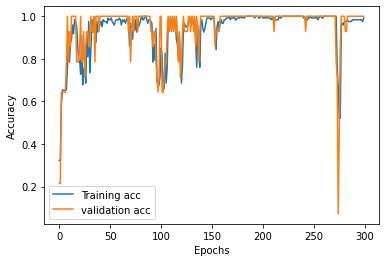

In [9]:
# plot training and validation accuracy
plt.plot(tf2model1_history.history['acc'])
plt.plot(tf2model1_history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'validation acc'])

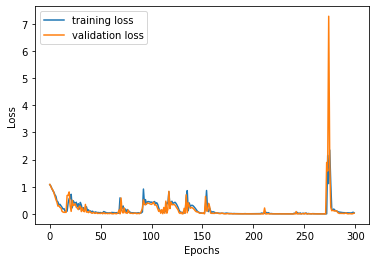

In [10]:
# plot training and validation loss
plt.plot(tf2model1_history.history['loss'])
plt.plot(tf2model1_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training loss', 'validation loss'])

In [11]:
tf2_model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 948us/step - loss: 0.5300 - acc: 0.8667


[0.5299826860427856, 0.8666666746139526]

In [12]:
# base model with l2-regularizer to prevent from overfitting
tf2_model2 = Sequential()  # sequential object

tf2_model2.add(Dense(64, activation='relu', input_shape=X_train[0].shape))
tf2_model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
tf2_model2.add(Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [13]:
 tf2_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
tf2model2_history = tf2_model2.fit(X_train, y_train,
              batch_size = 40,
              epochs=300,
              validation_split=0.1)

Epoch 1/300
4/4 [==============================] - 0s 72ms/step - loss: 1.8420 - acc: 0.3471 - val_loss: 1.7799 - val_acc: 0.7857
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 1.7773 - acc: 0.6777 - val_loss: 1.6972 - val_acc: 0.7857
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 1.6889 - acc: 0.6529 - val_loss: 1.5742 - val_acc: 0.7857
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5739 - acc: 0.6777 - val_loss: 1.4491 - val_acc: 0.4286
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 1.4434 - acc: 0.5289 - val_loss: 1.2791 - val_acc: 0.7857
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 1.3091 - acc: 0.8264 - val_loss: 1.1235 - val_acc: 0.7857
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1704 - acc: 0.8678 - val_loss: 0.9787 - val_acc: 0.9286
Epoch 8/300
4/4 [==============================] - 0s 9ms/step - loss: 1.0261 - acc: 0.909

Epoch 64/300
4/4 [==============================] - 0s 12ms/step - loss: 0.9640 - acc: 0.8017 - val_loss: 1.1543 - val_acc: 0.7143
Epoch 65/300
4/4 [==============================] - 0s 10ms/step - loss: 1.1483 - acc: 0.7355 - val_loss: 0.2432 - val_acc: 1.0000
Epoch 66/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3244 - acc: 0.9504 - val_loss: 0.7358 - val_acc: 0.8571
Epoch 67/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5097 - acc: 0.9174 - val_loss: 0.3643 - val_acc: 0.9286
Epoch 68/300
4/4 [==============================] - 0s 12ms/step - loss: 0.3370 - acc: 0.9835 - val_loss: 0.2539 - val_acc: 1.0000
Epoch 69/300
4/4 [==============================] - 0s 13ms/step - loss: 0.3499 - acc: 0.9504 - val_loss: 0.2501 - val_acc: 1.0000
Epoch 70/300
4/4 [==============================] - 0s 13ms/step - loss: 0.3302 - acc: 0.9669 - val_loss: 0.2572 - val_acc: 1.0000
Epoch 71/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2994 - a

4/4 [==============================] - 0s 9ms/step - loss: 0.6183 - acc: 0.8678 - val_loss: 0.5525 - val_acc: 1.0000
Epoch 127/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6180 - acc: 0.9504 - val_loss: 0.5479 - val_acc: 1.0000
Epoch 128/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6093 - acc: 0.8760 - val_loss: 0.5450 - val_acc: 0.8571
Epoch 129/300
4/4 [==============================] - 0s 9ms/step - loss: 0.5998 - acc: 0.7686 - val_loss: 0.5396 - val_acc: 0.8571
Epoch 130/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6002 - acc: 0.8595 - val_loss: 0.5377 - val_acc: 1.0000
Epoch 131/300
4/4 [==============================] - 0s 9ms/step - loss: 0.6019 - acc: 0.9752 - val_loss: 0.5337 - val_acc: 1.0000
Epoch 132/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5967 - acc: 0.9917 - val_loss: 0.5245 - val_acc: 1.0000
Epoch 133/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5812 - acc: 0.9669 -

4/4 [==============================] - 0s 11ms/step - loss: 0.2086 - acc: 0.9917 - val_loss: 0.1961 - val_acc: 1.0000
Epoch 189/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2078 - acc: 0.9917 - val_loss: 0.1970 - val_acc: 1.0000
Epoch 190/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2077 - acc: 0.9917 - val_loss: 0.1973 - val_acc: 1.0000
Epoch 191/300
4/4 [==============================] - 0s 9ms/step - loss: 0.2070 - acc: 0.9917 - val_loss: 0.1986 - val_acc: 1.0000
Epoch 192/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2068 - acc: 0.9917 - val_loss: 0.1983 - val_acc: 1.0000
Epoch 193/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2042 - acc: 0.9917 - val_loss: 0.2014 - val_acc: 1.0000
Epoch 194/300
4/4 [==============================] - 0s 11ms/step - loss: 0.2040 - acc: 0.9917 - val_loss: 0.1971 - val_acc: 1.0000
Epoch 195/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2044 - acc: 0.9

4/4 [==============================] - 0s 9ms/step - loss: 0.1946 - acc: 0.9917 - val_loss: 0.1819 - val_acc: 1.0000
Epoch 251/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1938 - acc: 0.9917 - val_loss: 0.1839 - val_acc: 1.0000
Epoch 252/300
4/4 [==============================] - 0s 9ms/step - loss: 0.1938 - acc: 1.0000 - val_loss: 0.1810 - val_acc: 1.0000
Epoch 253/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1928 - acc: 0.9917 - val_loss: 0.1818 - val_acc: 1.0000
Epoch 254/300
4/4 [==============================] - 0s 11ms/step - loss: 0.1928 - acc: 0.9917 - val_loss: 0.1811 - val_acc: 1.0000
Epoch 255/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1929 - acc: 0.9917 - val_loss: 0.1813 - val_acc: 1.0000
Epoch 256/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1900 - acc: 1.0000 - val_loss: 0.1810 - val_acc: 1.0000
Epoch 257/300
4/4 [==============================] - 0s 13ms/step - loss: 0.1899 - acc: 1.00

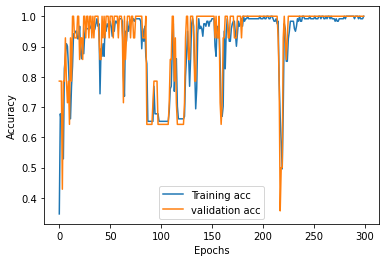

In [15]:
# plot training and validation accuracy
plt.plot(tf2model2_history.history['acc'])
plt.plot(tf2model2_history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'validation acc'])

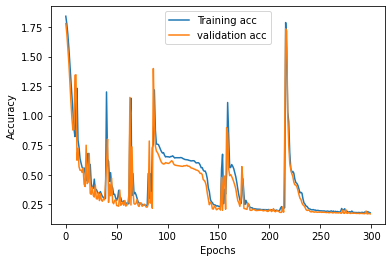

In [16]:
# plot training and validation accuracy
plt.plot(tf2model2_history.history['loss'])
plt.plot(tf2model2_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'validation acc'])

In [17]:
tf2_model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 952us/step - loss: 0.5618 - acc: 0.9333


[0.5618010759353638, 0.9333333373069763]